In [1]:
import gensim.downloader as api

# Load the model using gensim.downloader
model_GloVe = api.load("fasttext-wiki-news-subwords-300")

In [3]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [4]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [5]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=78


In [6]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [8]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [9]:
print(X_train[5])
print(sentence_for_training[5])

[ 327    3    1  414 1169    4  199 1170 1171  200  136   72  268  156
  805   41  806   15  328  201   36    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
['However', ',', 'the', 'multi-touch', 'gestures', 'and', 'large', 'tracking', 'area', 'make', 'having', 'an', 'external', 'mouse', 'unnecessary', '(', 'unless', 'you', "'re", 'gaming', ')', '.']


In [10]:
X_train.shape

(906, 78)

In [11]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [12]:
print(X_train.shape)

(906, 78)


In [13]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [14]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:  # Use model to access word vectors
       vocab_weight[i] = model_GloVe[i]

In [15]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1
weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [16]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [17]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [18]:
print(y_train.shape)
print(y_validation.shape)

(906, 78, 4)
(219, 78, 4)


In [19]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import SimpleRNN,LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


rnn_model = Sequential()
rnn_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
rnn_model.add(SimpleRNN(64, return_sequences=True))
rnn_model.add(TimeDistributed(Dense(4, activation='softmax')))

2024-03-17 10:43:25.690201: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-17 10:43:25.690383: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-17 10:43:25.690441: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-17 10:43:25.691190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-17 10:43:25.691810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
from sklearn.metrics import f1_score

def macro_f1(y_true, y_pred):
    # labels are one-hot encoded. so, need to convert
    # [1,0,0] to 0 and
    # [0,1,0] to 1 and
    # [0,0,1] to 2. Then pass these arrays to sklearn f1_score.
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    return f1_score(y_true, y_pred, average='macro')

In [21]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 300)           822300    
                                                                 
 simple_rnn (SimpleRNN)      (None, 78, 64)            23360     
                                                                 
 time_distributed (TimeDist  (None, 78, 4)             260       
 ributed)                                                        
                                                                 
Total params: 845920 (3.23 MB)
Trainable params: 845920 (3.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

# Train the model
rnn_training = rnn_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validation, y_validation))
#write code to print the training and validation loss and f1 macro not the graph






Epoch 1/10


2024-03-17 10:43:33.601003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 23s 3s/step - loss: 0.7367 - acc: 0.7101 - f1_m: 0.1636 - precision_m: 0.7574 - recall_m: 0.5534 - val_loss: 0.3385 - val_acc: 0.8881 - val_f1_m: 0.2272 - val_precision_m: 0.9882 - val_recall_m: 0.7478
Epoch 2/10
8/8 [==============================] - 19s 2s/step - loss: 0.2786 - acc: 0.9409 - f1_m: 0.2703 - precision_m: 0.9974 - recall_m: 0.7821 - val_loss: 0.2109 - val_acc: 0.9636 - val_f1_m: 0.4213 - val_precision_m: 0.9842 - val_recall_m: 0.8922
Epoch 3/10
8/8 [==============================] - 21s 3s/step - loss: 0.1757 - acc: 0.9703 - f1_m: 0.4082 - precision_m: 0.9802 - recall_m: 0.9279 - val_loss: 0.1466 - val_acc: 0.9727 - val_f1_m: 0.4461 - val_precision_m: 0.9780 - val_recall_m: 0.9468
Epoch 4/10
8/8 [==============================] - 19s 2s/step - loss: 0.1305 - acc: 0.9725 - f1_m: 0.4080 - precision_m: 0.9768 - recall_m: 0.9537 - val_loss: 0.1250 - val_acc: 0.9702 - val_f1_m: 0.4471 - val_precision_m: 0.9740 - val_recall_m: 0.9540
Epo

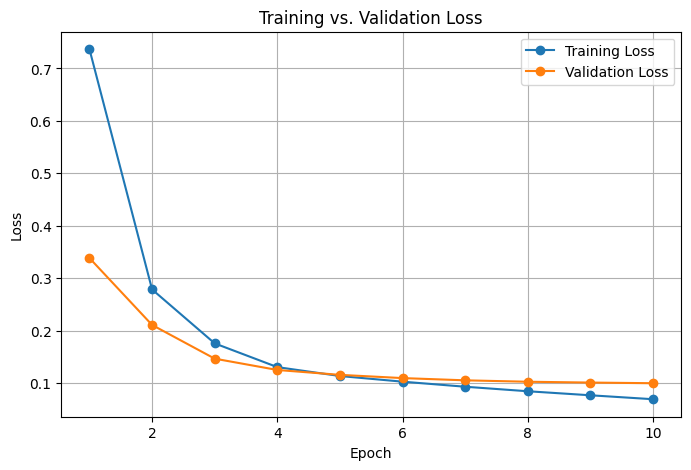

In [26]:
import matplotlib.pyplot as plt

train_loss = rnn_training.history['loss']
val_loss = rnn_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')

plt.legend()
plt.savefig('ATEFasttextRNNloss.png')
plt.grid(True)

plt.show()


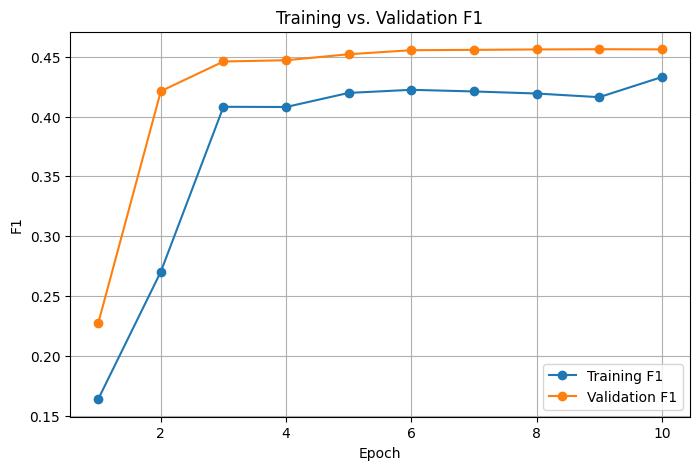

In [27]:
import matplotlib.pyplot as plt

train_loss = rnn_training.history['f1_m']
val_loss = rnn_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()
plt.savefig('ATEFasttextRNNf1.png')

plt.grid(True)

plt.show()

In [28]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [29]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [30]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [31]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [32]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [33]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 78, 4)


In [34]:
# take 5 random sentence, print it , its label and the predicted label



In [35]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)

11/11 [==============================] - 3s 228ms/step - loss: 0.1183 - acc: 0.9650 - f1_m: 0.3648 - precision_m: 0.9723 - recall_m: 0.9576
Loss: 0.11825689673423767
Metrics: [0.9649780988693237, 0.36484163999557495, 0.9722982048988342, 0.9575685262680054]


In [36]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = rnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)

11/11 [==============================] - 3s 251ms/step
0.48464183607562605


In [37]:
# print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test.flatten(), y_pred.flatten())
print(accuracy)

0.9649781113195748


**LSTM**

In [38]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [39]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [40]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=100


In [41]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [42]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [ ]:
# len(y_train[0])

In [ ]:
# len(y_test[0])

In [43]:
print(X_train[5])
print(sentence_for_training[5])

[ 327    3    1  414 1169    4  199 1170 1171  200  136   72  268  156
  805   41  806   15  328  201   36    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
['However', ',', 'the', 'multi-touch', 'gestures', 'and', 'large', 'tracking', 'area', 'make', 'having', 'an', 'external', 'mouse', 'unnecessary', '(', 'unless', 'you', "'re", 'gaming', ')', '.']


In [44]:
X_train.shape

(906, 100)

In [45]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [46]:
print(X_train.shape)

(906, 100)


In [47]:
print(sentence_for_training[0])

['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [48]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [49]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:
       vocab_weight[i] = model_GloVe[i]

In [50]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1
weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [51]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [52]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [53]:
print(y_train.shape)
print(y_validation.shape)

(906, 100, 4)
(219, 100, 4)


In [54]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


lstm_model = Sequential()
lstm_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(4, activation='softmax')))

In [57]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])




In [58]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

In [59]:
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of X_validation_np:", X_validation_np.shape)
print("Shape of y_train_np:", y_train_np.shape)
print("Shape of y_validation_np:", y_validation_np.shape)

Shape of X_train_np: (906, 100)
Shape of X_validation_np: (219, 100)
Shape of y_train_np: (906, 100, 4)
Shape of y_validation_np: (219, 100, 4)


In [61]:
lstm_training = lstm_model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_validation, y_validation))


Epoch 1/20
8/8 [==============================] - 1s 98ms/step - loss: 0.0698 - acc: 0.9793 - f1_m: 0.3792 - precision_m: 0.9820 - recall_m: 0.9780 - val_loss: 0.0877 - val_acc: 0.9797 - val_f1_m: 0.4170 - val_precision_m: 0.9808 - val_recall_m: 0.9776
Epoch 2/20
8/8 [==============================] - 1s 90ms/step - loss: 0.0645 - acc: 0.9794 - f1_m: 0.3881 - precision_m: 0.9813 - recall_m: 0.9769 - val_loss: 0.0878 - val_acc: 0.9795 - val_f1_m: 0.4168 - val_precision_m: 0.9808 - val_recall_m: 0.9775
Epoch 3/20
8/8 [==============================] - 1s 79ms/step - loss: 0.0594 - acc: 0.9795 - f1_m: 0.3806 - precision_m: 0.9836 - recall_m: 0.9787 - val_loss: 0.0880 - val_acc: 0.9795 - val_f1_m: 0.4167 - val_precision_m: 0.9810 - val_recall_m: 0.9770
Epoch 4/20
8/8 [==============================] - 1s 151ms/step - loss: 0.0546 - acc: 0.9797 - f1_m: 0.3861 - precision_m: 0.9857 - recall_m: 0.9784 - val_loss: 0.0894 - val_acc: 0.9792 - val_f1_m: 0.4165 - val_precision_m: 0.9811 - val_reca

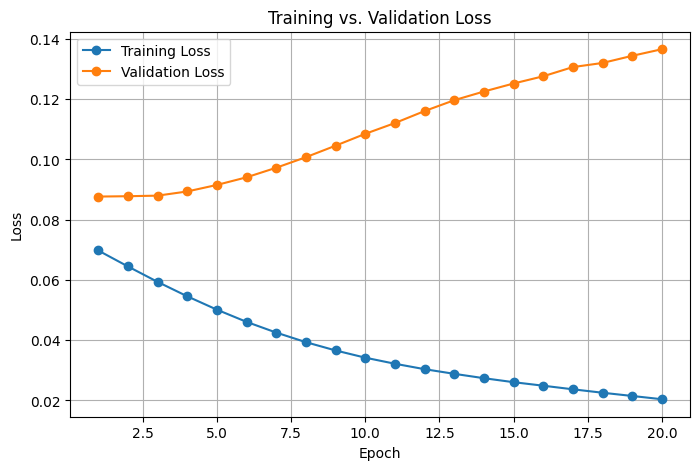

In [62]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['loss']
val_loss = lstm_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.savefig('ATEFasttextLSTMloss.png')

plt.grid(True)

plt.show()


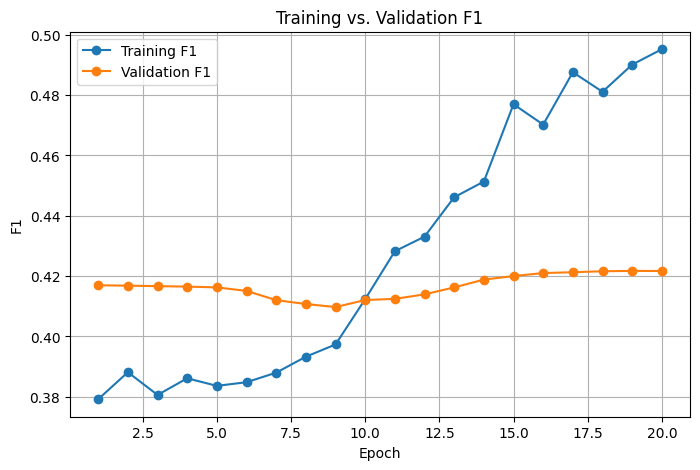

In [63]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['f1_m']
val_loss = lstm_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()
plt.savefig('ATEFasttextLSTMf1.png')

plt.grid(True)

plt.show()


In [64]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [65]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [66]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [67]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [68]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [69]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 100, 4)


In [70]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)


11/11 [==============================] - 4s 343ms/step - loss: 0.0925 - acc: 0.9727 - f1_m: 0.3396 - precision_m: 0.9785 - recall_m: 0.9669
Loss: 0.09247327595949173
Metrics: [0.9726829528808594, 0.33957651257514954, 0.9784657955169678, 0.9669034481048584]


In [71]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)

11/11 [==============================] - 1s 21ms/step
0.4973169330352471


In [72]:
print("Accuracy:", accuracy_score(y_test.flatten(), y_pred.flatten()))

Accuracy: 0.9645426829268293


**GRU**

In [73]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [74]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [75]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=100


In [76]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [77]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [78]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [79]:
print(X_train.shape)

(906, 100)


In [80]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [81]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:
       vocab_weight[i] = model_GloVe[i]

In [82]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1
weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [83]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [85]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [86]:
print(y_train.shape)
print(y_validation.shape)

(906, 100, 4)
(219, 100, 4)


In [98]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import GRU,SimpleRNN,LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


gru_model = Sequential()
gru_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(TimeDistributed(Dense(4, activation='softmax')))

In [99]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])




In [100]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

# Train the model
gru_training = gru_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validation, y_validation))
#write code to print the training and validation loss and f1 macro not the graph






Epoch 1/10
8/8 [==============================] - 4s 374ms/step - loss: 1.0622 - acc: 0.6531 - f1_m: 0.0843 - precision_m: 0.3750 - recall_m: 0.2983 - val_loss: 0.4446 - val_acc: 0.9638 - val_f1_m: 0.2326 - val_precision_m: 1.0000 - val_recall_m: 0.7987
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.3236 - acc: 0.9692 - f1_m: 0.2379 - precision_m: 1.0000 - recall_m: 0.8060 - val_loss: 0.2170 - val_acc: 0.9771 - val_f1_m: 0.2387 - val_precision_m: 1.0000 - val_recall_m: 0.8072
Epoch 3/10
8/8 [==============================] - 1s 111ms/step - loss: 0.1889 - acc: 0.9779 - f1_m: 0.2739 - precision_m: 0.9979 - recall_m: 0.8413 - val_loss: 0.1472 - val_acc: 0.9799 - val_f1_m: 0.4044 - val_precision_m: 0.9873 - val_recall_m: 0.9396
Epoch 4/10
8/8 [==============================] - 1s 114ms/step - loss: 0.1277 - acc: 0.9792 - f1_m: 0.3748 - precision_m: 0.9833 - recall_m: 0.9588 - val_loss: 0.1018 - val_acc: 0.9803 - val_f1_m: 0.4152 - val_precision_m: 0.9812 - val_r

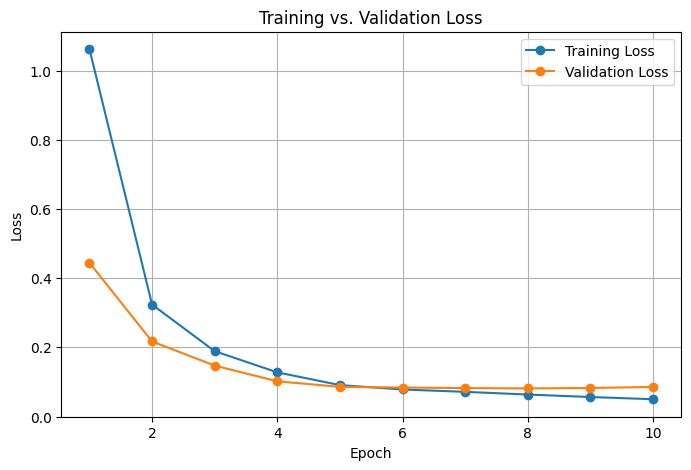

In [103]:
import matplotlib.pyplot as plt

train_loss = gru_training.history['loss']
val_loss = gru_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.savefig('ATEFasttextGRUloss.png')   

plt.grid(True)

plt.show()


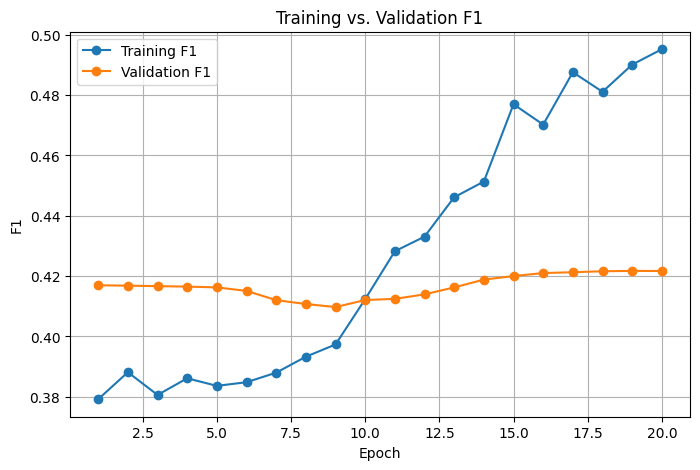

In [104]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['f1_m']
val_loss = lstm_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()
plt.savefig('ATEFasttextGRUf1.png')

plt.grid(True)

plt.show()


In [105]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [106]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [107]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [108]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [109]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [110]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 100, 4)


In [111]:
# take 5 random sentence, print it , its label and the predicted label



In [112]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)


11/11 [==============================] - 4s 311ms/step - loss: 0.0925 - acc: 0.9727 - f1_m: 0.3396 - precision_m: 0.9785 - recall_m: 0.9669
Loss: 0.09247327595949173
Metrics: [0.9726829528808594, 0.33957651257514954, 0.9784657955169678, 0.9669034481048584]


In [113]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = gru_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)

11/11 [==============================] - 1s 30ms/step
0.488030598152626


In [114]:
print("Accuracy:", accuracy_score(y_test.flatten(), y_pred.flatten()))  

Accuracy: 0.9764024390243903


In [115]:
# save the models
rnn_model.save('ATEFasttextRNN.h5')
lstm_model.save('ATEFasttextLSTM.h5')
gru_model.save('ATEFasttextGRU.h5')


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
